# Análisis de Fluctuaciones sin Tendencia (Algoritmo DFA)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Introducción

Supongamos que, se tiene una serie de tiempo $\{X_t\}_{t\in\mathbb{N}}$, con $n\in\mathbb{N}$ observaciones: 

$$x_1,x_2,\dots,x_n.$$

Dada $\{x_i\}_{i=1}^{n}$, se siguen los pasos que se describen a continuación: 

### **Paso 1.** 

Se calcula la media:

$$m=\frac{1}{n}\sum_{i=1}^{n}x_i.$$

### **Paso 2.** 

Luego, calculamos la serie $\{y_k\}_{k=1}^{n}$, la cual corresponde a las sumas acumuladas desplazando la media global de la ST

$$y_k=\sum_{i=1}^{k}(x_i-m),\quad\forall k\in\{1,2,\dots,n\}.$$ 

### **Paso 3.**

Ahora, particionamos la serie $\{y_k\}_k$ en conjuntos (ajenos) de tamaño $w\in\mathbb{N}$, a los cuales, llamaremos $\mathbf{X}_r$, para $r=1,2,\dots,\frac{n}{w}$ (asumiendo que $n$ es múltiplo de $w$). 

* A cada subconjunto, le llamaremos, *"ventana"*.
* Llamaremos a $w$ como el *"tamaño de la ventana"*.

Observemos que, estas ventanas pueden ser expresadas de la siguiente forma:

\begin{align*}
\mathbf{X}_1&=\{y_1,y_2,\dots,y_w\}\\
\mathbf{X}_2&=\{y_{w+1},y_{w+2},\dots,y_{2w}\}\\
&\hspace{2mm}\vdots\\
\mathbf{X}_{n/w}&=\{y_{n-w+1},y_{n-w+2},\dots,y_{n}\}.
\end{align*}

### **Paso 4.**

Por mínimos cuadrados, calculamos las ordenadas de la recta que mejor aproxime a los valores de cada caja $\mathbf{X}_r$. Llamemos $y_w(t)$ a la ordenada para el tiempo $t\in\{1,2,\dots,n\}$. Esto será la tendencia local a la ventana $\mathbf{X}_r$ con $r=t//w+1$, donde // denota *división entera*.  

**Nota:** La división entera, es una división en la cuál, la parte fraccionaria (residuo) es descartada. También puede ser definida como:

$$a//b=\lfloor a/b\rfloor.$$

### **Paso 5.**

Posteriormente, quitamos la tendencia a la suma acumulada y calculamos su **Fluctuación Media Cuadrática** (FMC) de esta manera:

$$F(w)=\sqrt{\frac{1}{n}\sum_{t=1}^{n}\big(y_t-y_w(t)\big)^2}.$$

### **Paso 6.**

Por último, graficamos la función $F(w)$ en escala log-log, y le aproximamos una recta por mínimos cuadrados. El DFA (denotado por $\alpha>0$) de $\{x_i\}_{i=1}^{n}$, será la pendiente de esta recta. 

**Observación:** Para series de tiempo que siguen una ley de potencias, siempre ocurre que $\alpha>0$, pues se puede ver que, en escala log-log, $F(w)$ incrementa conforme $w$ lo hace.

### **Paso 7.**

De acuerdo al valor que obtuvimos de $\alpha$, podemos decir lo siguiente de nuestra serie de tiempo:

* $0<\alpha<1/2$: Datos anticorrelacionados.
* $\alpha\simeq 1/2$: No hay Correlación (Ruido Blanco).
* $1/2<\alpha<1$: Datos correlacionados a ciertas escalas.
* $\alpha\simeq1$: Ruido Rosa (Ruido 1/f).
* $\alpha>1$: Correlaciones a toda escala (correspondería a la dinámica de un Sistema Complejo en Estado Crítico).
* $\alpha\simeq3/2$: Ruido Browniano.  

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Ejemplo 

En este caso, aplicaremos el algoritmo DFA a una serie de tiempo de $n=730$ observaciones. Comenzaremos por imporar nuestros datos que conforman la serie de tiempo. 

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt 

# Graficaremos las Series de Tiempo en modo oscuro 
plt.style.use('dark_background')

# Leemos los datos 
xs = np.loadtxt('pruebaDfa.txt')
N = len(xs)

# Tiempos 
ts = np.arange(N)

# Datos desplazados por media
m = xs.mean()
dsp = xs - m 

### **1. Calcular la Media**
Como primer paso para el algoritmo, podemos graficar la serie de tiempo junto con su media. Posteriormente, también podemos visualizar la serie de tiempo trasladada por su media. 

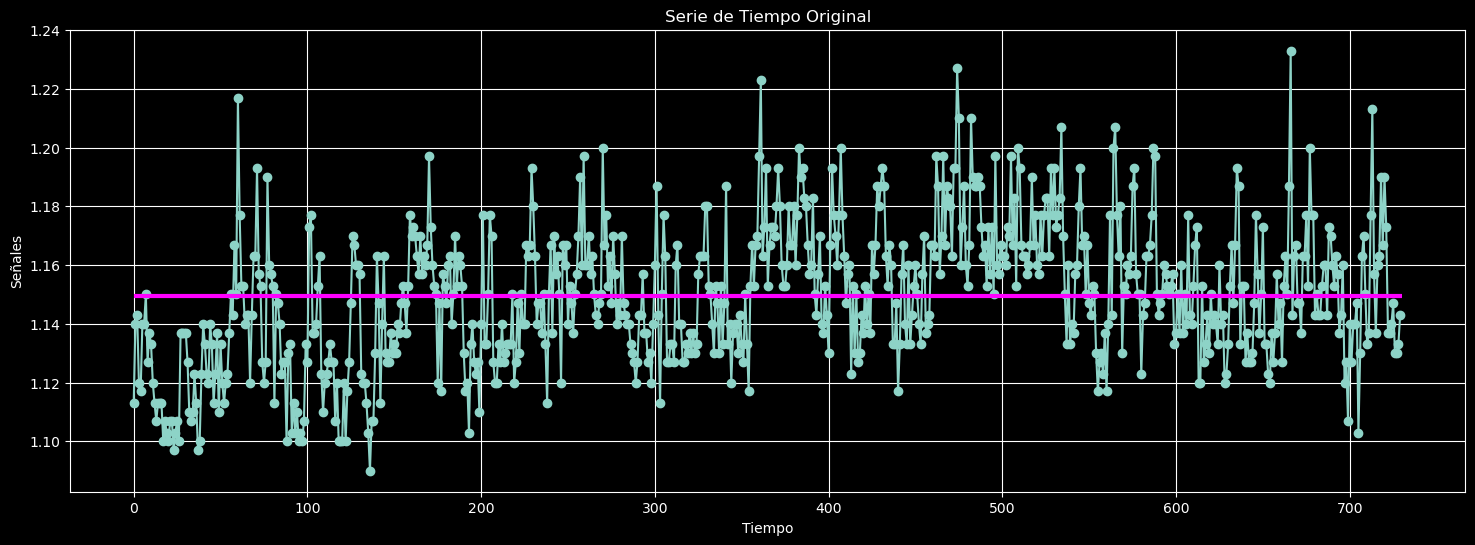

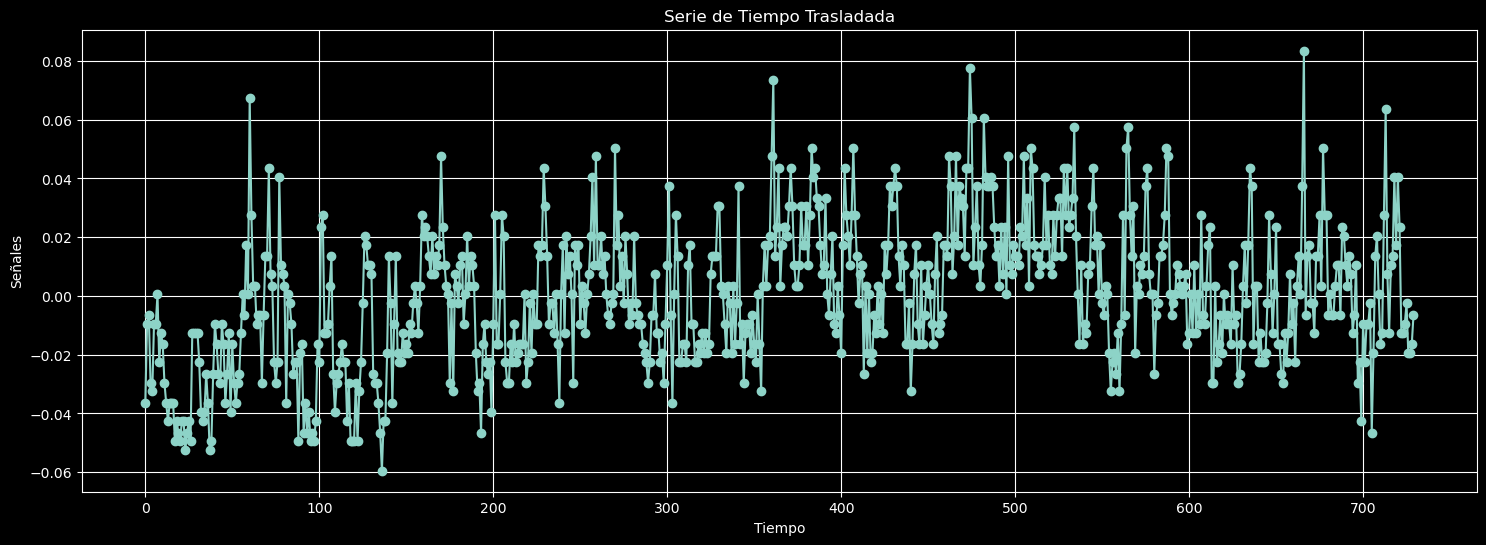

In [2]:
# Graficamos la serie de tiempo junto con su media
plt.figure(figsize=(18,6))
plt.grid(True)
plt.plot(ts,xs,marker='o')
plt.hlines(m,0,N,colors='magenta',linewidth=3)
plt.xlabel('Tiempo')
plt.ylabel('Señales')
plt.title('Serie de Tiempo Original')

# Grafiamos la serie de tiempo trasladada por su media
plt.figure(figsize=(18,6))
plt.grid(True)
plt.plot(ts,dsp,marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Señales')
plt.title('Serie de Tiempo Trasladada')
plt.show()

### **2. Serie de Sumas Acumuladas Desplazadas**

A partir de la serie de tiempo, calculamos $\{y_k\}_k$. Podemos graficar también esta serie de tiempo. 

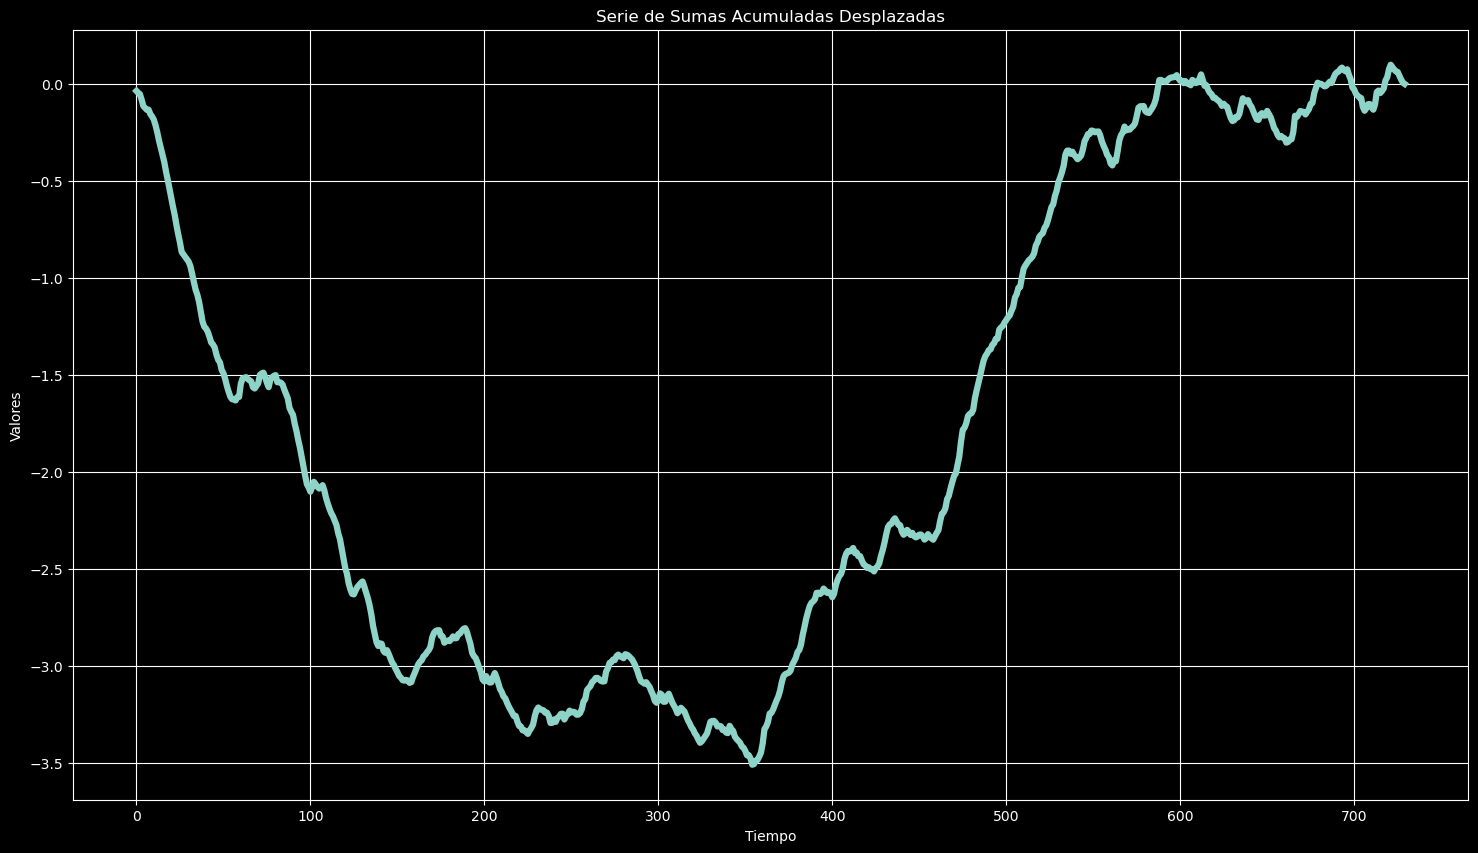

In [3]:
# Calculamos la serie de sumas acumuladas desplazadas 
yk = dsp.cumsum()

# Graficamos la serie de sumas acumuladas desplazadas 
plt.figure(figsize=(18,10))
plt.grid(True)
plt.plot(ts,yk,linewidth=4.5)
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Serie de Sumas Acumuladas Desplazadas')
plt.show()

### **3. Aproximación por Ventanas de la Serie Anterior**

Una vez que calculamos la serie $\{y_k\}_k$, la dividimos en un cierto número de ventanas, del mismo tamaño cada una. Para cada ventana, se aproximan sus datos a partir de mínimos cuadrados. Con ello, obtendremos la tendencia local de cada ventana. 

Este procedimiento se repite una cantidad determinada de veces para ventanas de distinto tamaño.  

<Figure size 640x480 with 0 Axes>

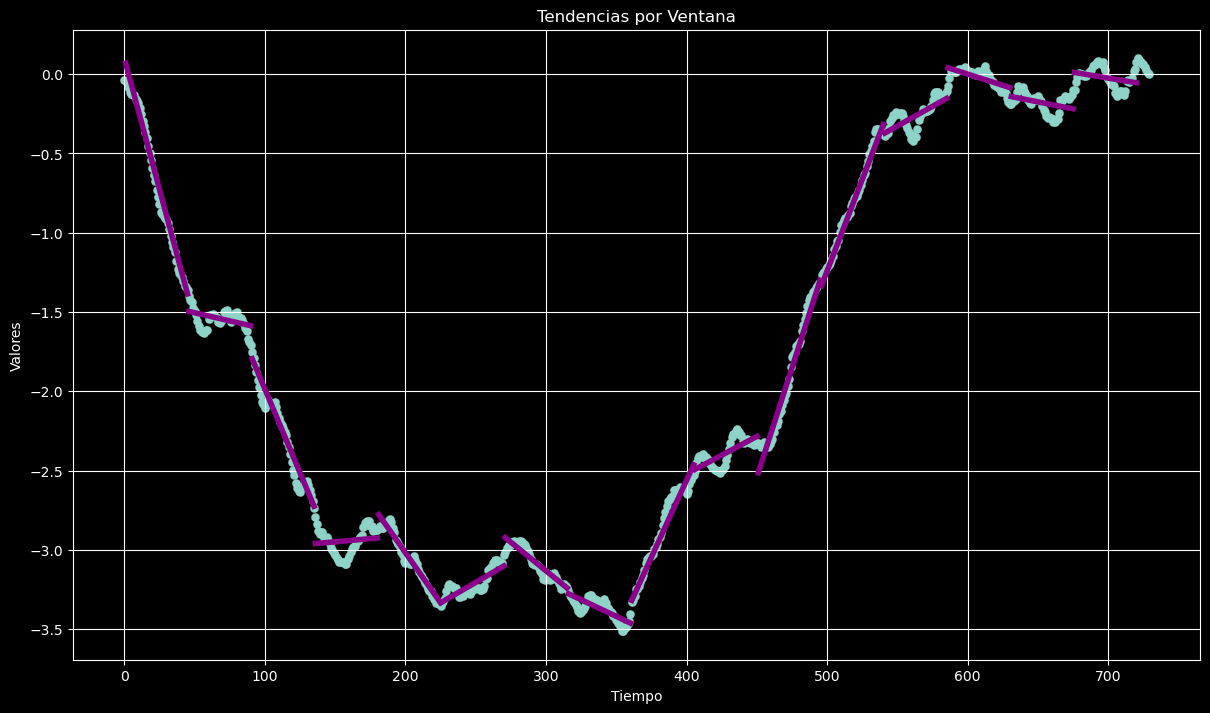

<Figure size 640x480 with 0 Axes>

In [4]:
def porVentana(tamVen,numVens,yk,dib_seg):
    n = yk.size
    
    st = []
    # Por cada i-ésima ventana
    for nv in range(numVens):
        # Definimos los datos de cada ventana
        xR = yk[nv*tamVen:((nv+1)*tamVen)]
        x = np.arange(nv*tamVen+1,((nv+1)*tamVen)+1)

        # Con mínimos cuadrados, calculamos la recta que mejor aproxima cada ventana
        rectaV = np.polyfit(x,xR,1)
        # Nos da el polinomio 
        fV = np.poly1d(rectaV)

        # Calculamos ordenadas con la función anterior
        ordenada =  fV(x)
        st = np.append(st,(ordenada - xR)**2) 
        if dib_seg == True:
            plt.figure(2)
            ax21.plot(x,fV(x),color='darkmagenta',linewidth=4)

    # Calculamos F(n) de cada ventana 
    valor = st.cumsum()
    # Valor final de F(n)
    valf = (valor[valor.size-1] * (1/N))**0.5
    return valf

plt.figure(figsize=(32,18))
ax21 = plt.subplot(221)
ax21.scatter(ts,yk,linewidths=0.15)
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Tendencias por Ventana')
ax21.grid()

# Tamaños de ventana sugeridos 
tamVnSug = []
for t in range(11,int(N/4)):
    if int(4*(2**(1/8))**t+0.5) <= int(N/4):
        tamVnSug = np.append(tamVnSug,int(4*(2**(1/8))**t+0.5))
    else:
        break
# Valuamos Fn
Fn = []
for tamVen in tamVnSug:
    Fn = np.append(Fn,porVentana(int(tamVen),int(N/tamVen),yk,False))

# Dibuja los segmentos de recta en cada ventana para un tamaño de ventana dada
tv = int(len(tamVnSug)/2)
porVentana(int(tamVnSug[tv]),int(N/tamVnSug[tv]),yk,True)
plt.figure(2)

### **4. Calcular y Graficar FMC**

Con las tendencias que obtuvimos por cada ventana, calcularemos la función de Fluctuación Media Cuadrática (FMC) denotada por $F(w)$, donde $w$ nos dice el tamaño que tendrán todas las ventanas al momento de calcular la FMC.  

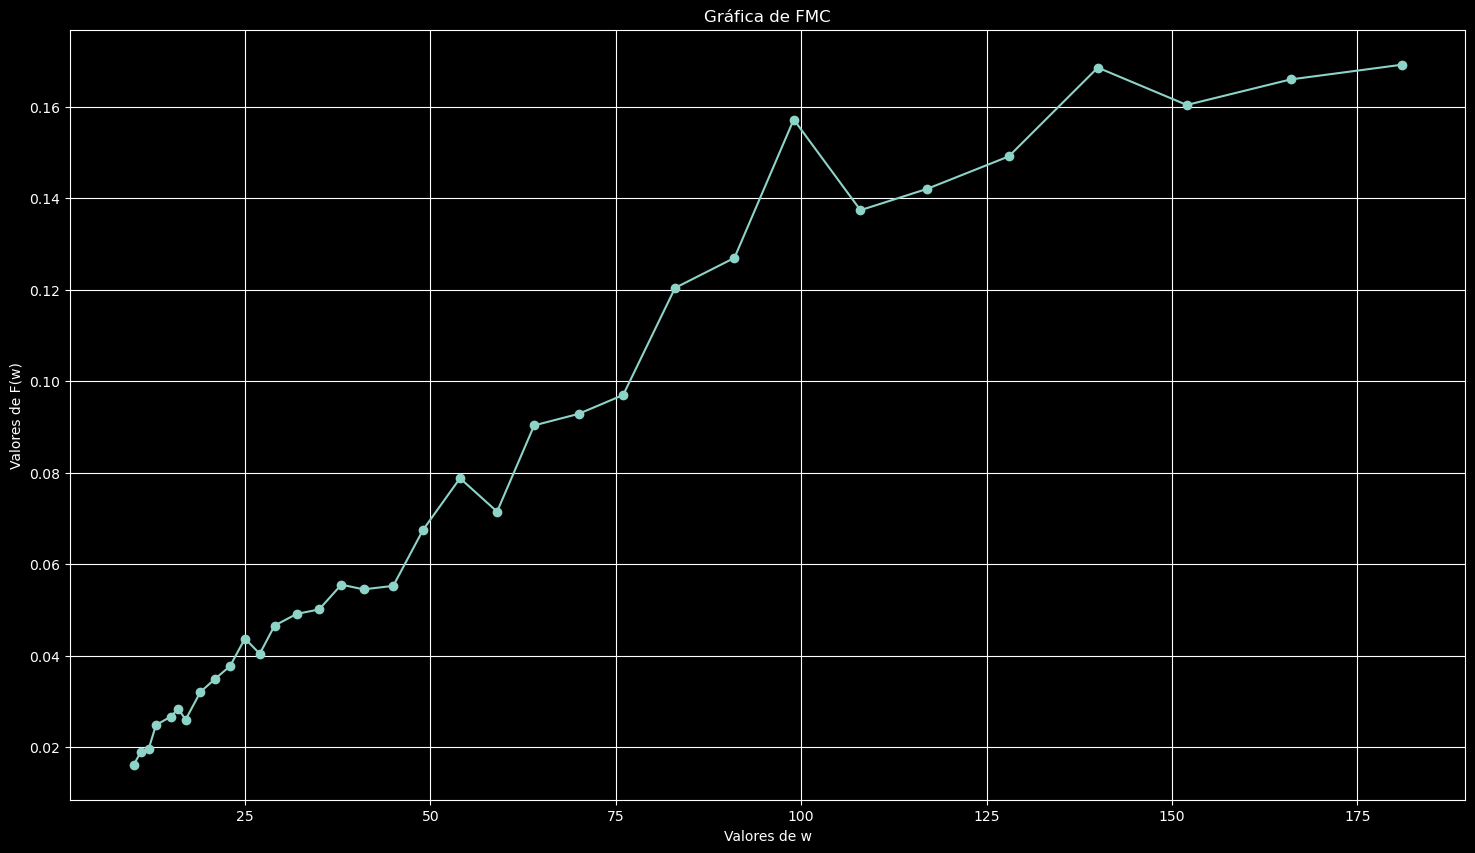

In [5]:
# Graficamos la FMC
plt.figure(figsize=(18,10))
plt.grid(True)
plt.plot(tamVnSug,Fn,marker='o')
plt.xlabel('Valores de w')
plt.ylabel('Valores de F(w)')
plt.title('Gráfica de FMC')
plt.show()  

### **5. Graficar FMC en Escala Log-Log y Aproximar**

Para ver qué tipo de correlación existe (o no existe) en la serie de tiempo, Transformamos la FMC a escala log-log y la graficamos. A la función resultante, le aproximamos una recta por mínimos cuadrados y calculamos su pendiente. Esta pendiente, será el DFA o el valor $\alpha>0$ que buscamos.   

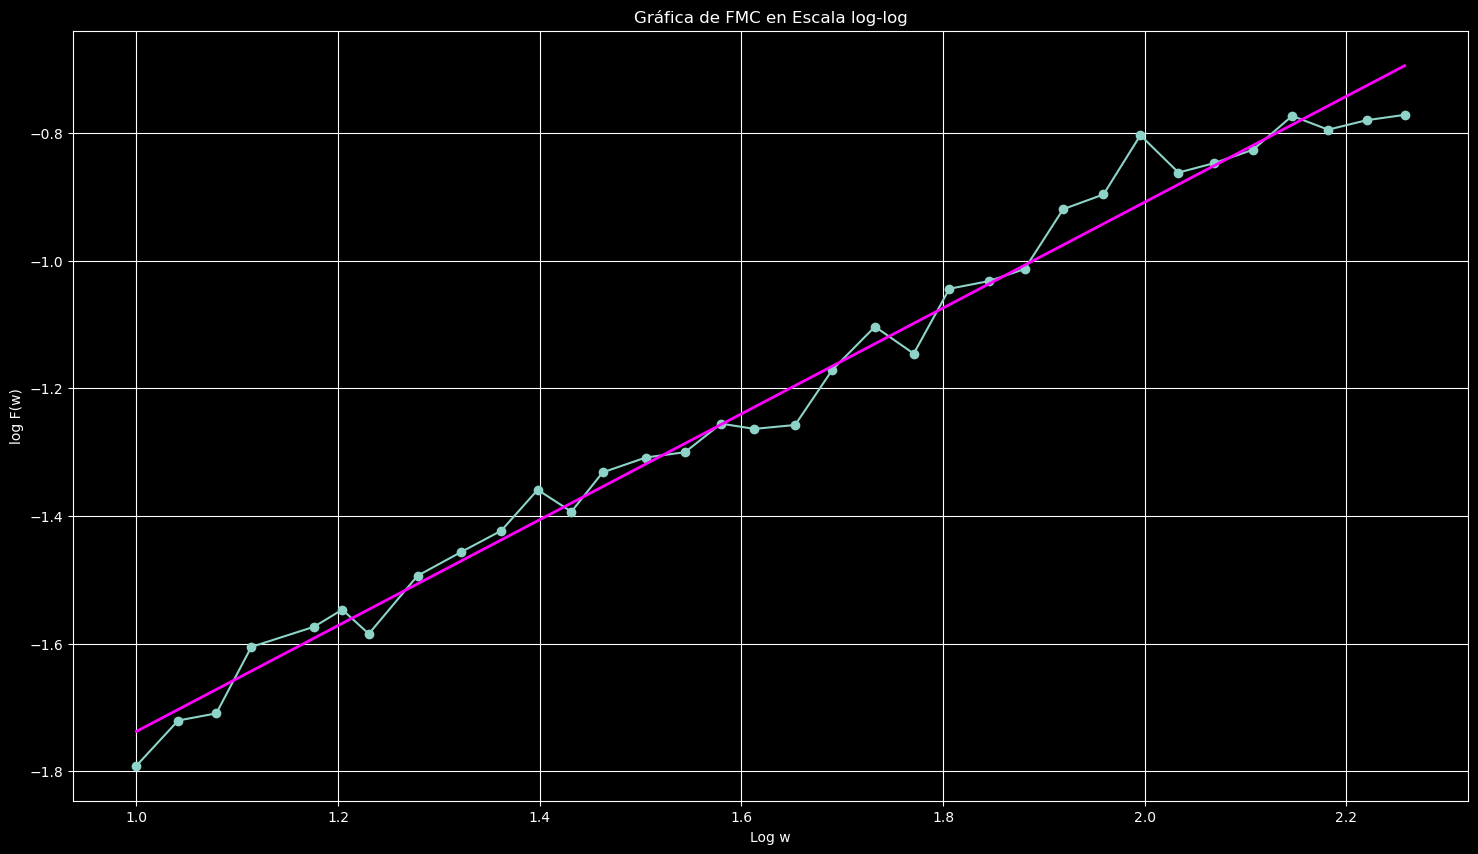

DFA alpha: 0.829


In [6]:
# A los Fn calculamos mínimos cuadrados. 
rectaLog = np.polyfit(np.log10(tamVnSug),np.log10(Fn),1)
fLog = np.poly1d(rectaLog)

ejex = np.log10(tamVnSug)
ejey = fLog(np.log10(tamVnSug))

# Graficamos e imprimimos los datos
plt.figure(figsize=(18,10))
plt.grid(True)
plt.plot(np.log10(tamVnSug),np.log10(Fn),marker='o') # FMC en escala log-log
plt.plot(ejex,ejey,color='magenta',linewidth=2.0) # Aproximación por Mínimos Cuadrados
plt.xlabel('Log w')
plt.ylabel('log F(w)')
plt.title('Gráfica de FMC en Escala log-log')
plt.show()
print('DFA alpha: %.3f'%(fLog[1])) # Pendiente de recta por mínimos cuadrados

### **6. Analizamos el DFA**

Por ultimo, solamente hacemos notar que $\frac{1}{2}<\alpha=0.829<1$, lo cual, nos dice que existen correlaciones positivas en nuestra serie de tiempo. Sin embargo, estas correlaciones no ocurren a toda escala de tiempo. 